<a href="https://colab.research.google.com/github/yelsinhc2025/PROGRANACION-102/blob/main/4_simulated_annealing_tsp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulated Annealing

# Plotting


Ejemplo de como visualizar los nodos

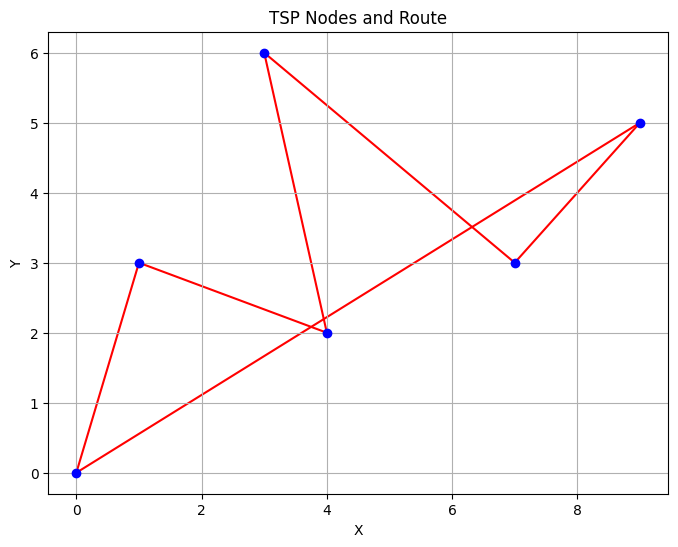

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt

def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

# Example usage:
nodes = [(0, 0), (1, 3), (4, 2), (3, 6), (7, 3), (9, 5)]  # Coordinates of nodes
route = [0, 1, 2, 3, 4, 5]  # Example TSP route (indices of nodes)

plot_tsp(nodes, route)

# Implementación

Generación de datos TSP y solución inicial

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

N = 50
positions = np.random.rand(N, 2)
distances = squareform(pdist(positions, 'euclidean'))
print(positions)
print(distances)


[[0.60407527 0.85227685]
 [0.87085234 0.22772038]
 [0.88304547 0.0304988 ]
 [0.92139153 0.6686263 ]
 [0.21617942 0.80089347]
 [0.59405354 0.62552702]
 [0.30238831 0.61124338]
 [0.05267833 0.90010718]
 [0.82003294 0.09978611]
 [0.01167191 0.71452018]
 [0.5256627  0.69506   ]
 [0.32312892 0.6400756 ]
 [0.05756401 0.54536425]
 [0.17547516 0.45408347]
 [0.08317295 0.95694349]
 [0.85635027 0.2626433 ]
 [0.39273946 0.58786138]
 [0.68182328 0.61847845]
 [0.17244566 0.59864474]
 [0.75912706 0.87034503]
 [0.77838053 0.87289598]
 [0.58401392 0.50722101]
 [0.26363877 0.1329564 ]
 [0.32582693 0.67591914]
 [0.30802706 0.40573837]
 [0.02234835 0.01217293]
 [0.59033505 0.27087056]
 [0.10707751 0.95952979]
 [0.82185454 0.49217568]
 [0.14263472 0.4336628 ]
 [0.92256667 0.11387757]
 [0.99313083 0.10267895]
 [0.28692439 0.2136093 ]
 [0.00263839 0.59476608]
 [0.85372634 0.55397369]
 [0.56578029 0.9920038 ]
 [0.33722548 0.92840641]
 [0.18672753 0.01025553]
 [0.83163502 0.91903604]
 [0.83161168 0.73121404]


Algoritmo Simulated Annealing

In [ ]:
def fitness(sol):
  distance = 0
  for i in range(len(sol)-1):
    distance += distances[sol[i]][sol[i+1]]
  return distance

def random_neighbor(sol):

  i, j = np.random.choice(len(sol), 2, replace=False) # two random indices
  new_sol = sol.copy()
  new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
  return new_sol

def accept(delta, T):
  if delta < 0:
    return True
  else: # damos la opcion de aceotar soluciones malas.
    r = np.random.rand() # random value between [0, 1]
    if r < np.exp(-delta/T):
      return True
    else:
      return False

def simulated_annealing(T_max, T_min, cooling_rate):
  T = T_max
  x = initial_solution.copy()
  E = fitness(x)

  print("temperatura:", T)
  print("x", x)
  print("E", E, "\n")


  while (T > T_min) :
    x_new = random_neighbor(x)
    E_new = fitness(x_new)
    delta = E_new - E
    #print("iteration, T:", T, " delta:", delta)
    if accept(delta, T):
      x = x_new
      E = E_new

    T = T*cooling_rate

  return x


[23 44  2 24  6 13 42 31 26  1 40 21 20 47  9 46  4 49 28 35 30 29 36  0
 25 12  7 38 32 15 17 37 43  5 48 41 22 18 16 45 39 34 19  3 27  8 10 14
 33 11]


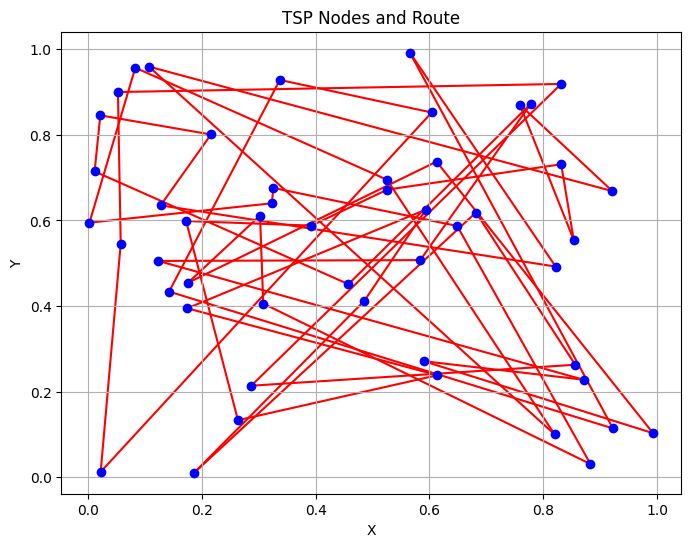

temperatura: 1000
x [23 44  2 24  6 13 42 31 26  1 40 21 20 47  9 46  4 49 28 35 30 29 36  0
 25 12  7 38 32 15 17 37 43  5 48 41 22 18 16 45 39 34 19  3 27  8 10 14
 33 11]
E 24.294566338088714 

[ 3 39 38 20 19 35 36 40 13 29 48 25 37 22 32 24 47 21 44 17  5 45 10  0
 42 34 28 15  1 30 31  2  8 41 26 43  4 27 14  7 46  9 33 12 49 18  6 11
 23 16]
6.569224982078272


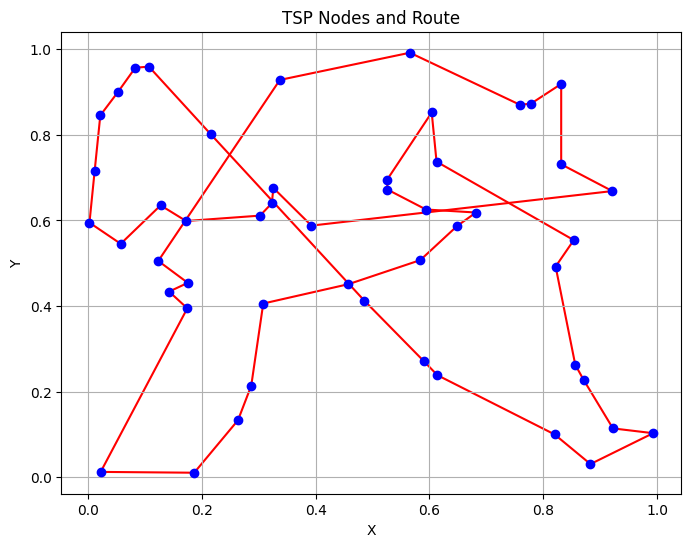

In [ ]:
T_max = 1000
T_min = 0.000001
#T_min = 0.1
cooling_rate = 0.9999


# initial solution
initial_solution = np.array(list(range(N)))
np.random.shuffle(initial_solution)
print(initial_solution)
plot_tsp(positions, initial_solution)

# best solution
sol = simulated_annealing(T_max, T_min, cooling_rate)
print(sol)
print(fitness(sol))
plot_tsp(positions, sol)

# Simulated Annealing vs Hill Climbing

Hill Climbing

In [ ]:
def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range(i + 1, len(sol)):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)

  return neighbors

def hill_climbing(sol):
  while True:
    #print("iteration:", sol)
    neighbors = get_neighbors(sol)
    best_neighbor = min(neighbors, key=fitness)

    if fitness(best_neighbor) < fitness(sol):
      sol = best_neighbor
    else:
      return sol


temperatura: 1000
x [40 29 48 42 10  9 24 26 13 23 44  7  5 19 38 21  0 45 20 25 39 32 11 33
 34 43 12  8 28  6  1 31 15 36 41 17 27  4 46 16 47 35 37 14 30 18  2 49
 22  3]
E 26.801704860510867 

Hill Climbing distance 7.509059942382012
Simulated Annealing distance 6.693283440549006


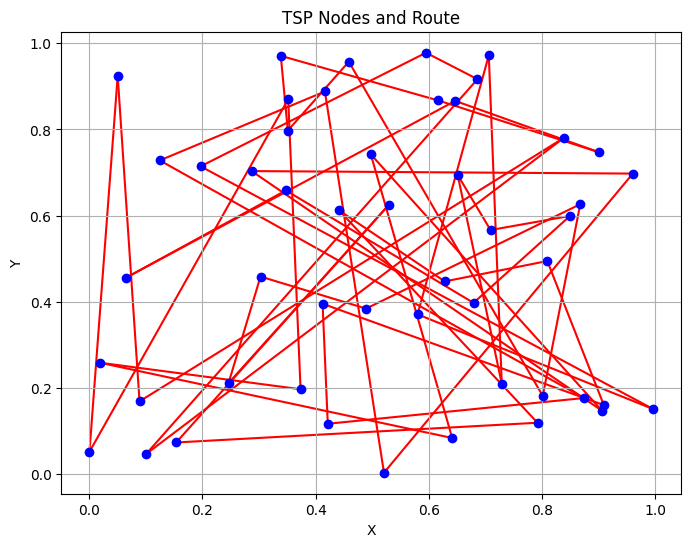

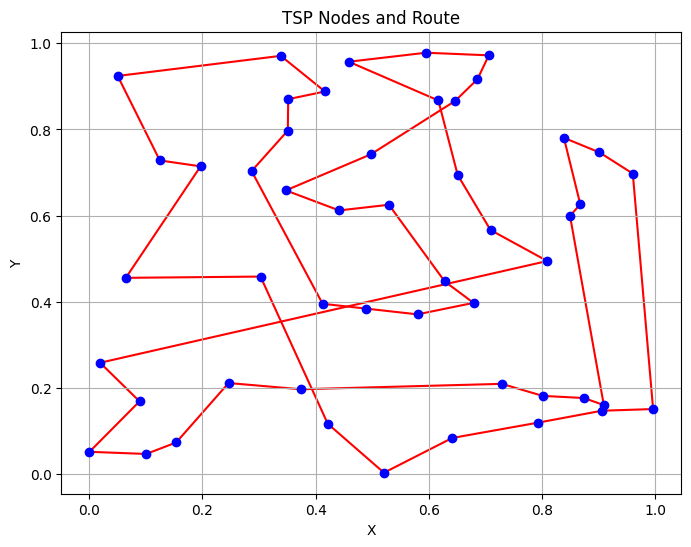

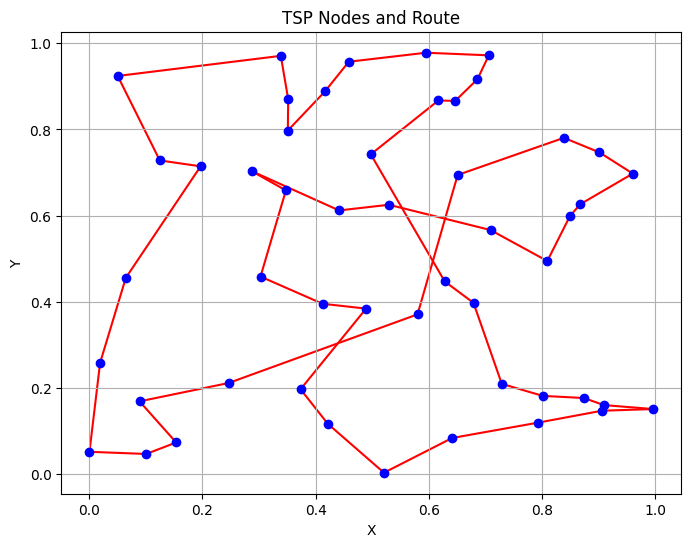

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

N = 50
positions = np.random.rand(N, 2)
distances = squareform(pdist(positions, 'euclidean'))

# initial solution
initial_solution = np.array(list(range(N)))
np.random.shuffle(initial_solution)

sol1 = hill_climbing(initial_solution)
sol2 = simulated_annealing(T_max, T_min, cooling_rate)

print("Hill Climbing distance", fitness(sol1))
print("Simulated Annealing distance", fitness(sol2))

plot_tsp(positions, initial_solution)
plot_tsp(positions, sol1)
plot_tsp(positions, sol2)